In [1]:
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from parse_util import is_cjk
from graph_util import *
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm

font_path = '/home/ycm/.fonts/SourceHanSansSC-Regular.otf'
prop = mfm.FontProperties(fname=font_path)

with open('CHAR_TO_IDS.pkl', 'rb') as f:
    char_to_ids = pkl.load(f)
char_to_ids['书'] = Char('书')
char_to_ids['已'] = Char('已')
char_to_ids['亊'] = Char('亊')
char_to_ids['枭'] = Char('枭')
char_to_ids['枭'] = Char('枭')
char_to_ids['袅'] = Char('袅')

In [2]:
N_YEARS_PER_BLOCK = 5
START_YEAR = 1950
time_periods = list(range(START_YEAR,
                          START_YEAR + 1 + N_YEARS_PER_BLOCK * min(i for i in range(125) if START_YEAR + i * N_YEARS_PER_BLOCK >= 2020),
                          N_YEARS_PER_BLOCK))

In [3]:
df = pd.read_pickle('df_full_5y.pkl')
pos_list = set(df.pos)

In [8]:
def generate(MIN_TOTAL_OCCURRENCE_THRESHOLD, POS):
    def row_is_at_least_threshold(row):
        return sum(row[f'{t}_n_occ'] for t in time_periods) >= MIN_TOTAL_OCCURRENCE_THRESHOLD
    
    df_VERB = df[df.pos == POS]
    df_VERB_at_least_threshold = df_VERB[df_VERB.apply(row_is_at_least_threshold, axis=1)]
    df_VERB_at_least_threshold.shape

    denoms = [df_VERB_at_least_threshold[f'{t}_n_occ'].sum() for t in time_periods]

    plt.figure(dpi=100)
    plt.title(f'pos = {POS}, threshold = {MIN_TOTAL_OCCURRENCE_THRESHOLD}, rows = {df_VERB_at_least_threshold.shape[0]}')

    for length in range(1, 5):
        df_VERB_at_least_threshold_given_len = df_VERB_at_least_threshold[
            df_VERB_at_least_threshold.term.apply(lambda term: len(term) == length)]

        numers = [df_VERB_at_least_threshold_given_len[f'{t}_n_occ'].sum() for t in time_periods]
        points = np.array(numers) / np.array(denoms)
        plt.plot(time_periods, points, label=f'length {length}')
    plt.legend()
    plt.show()

/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)


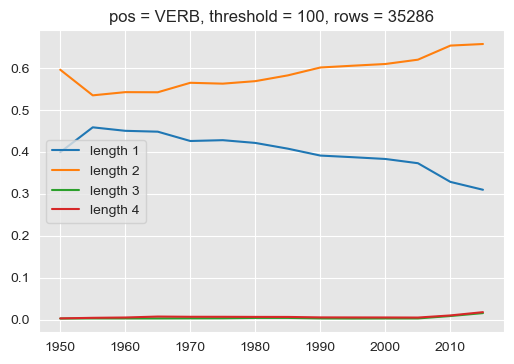

/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)


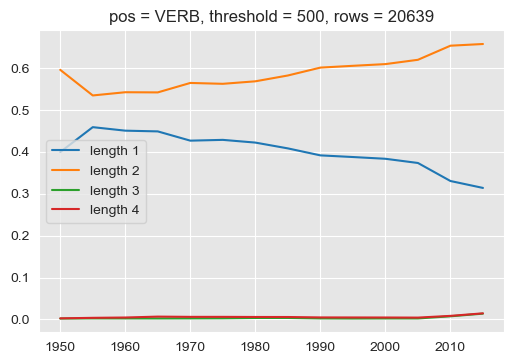

/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)


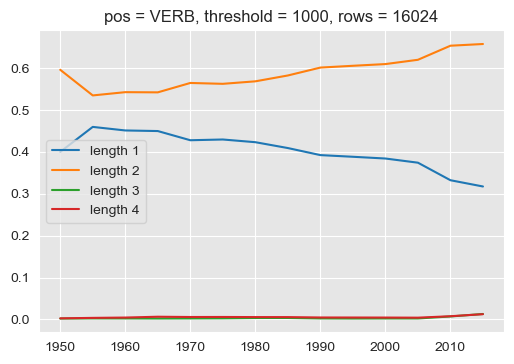

In [12]:
generate(100, 'VERB')
generate(500, 'VERB')
generate(1000, 'VERB')

/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)


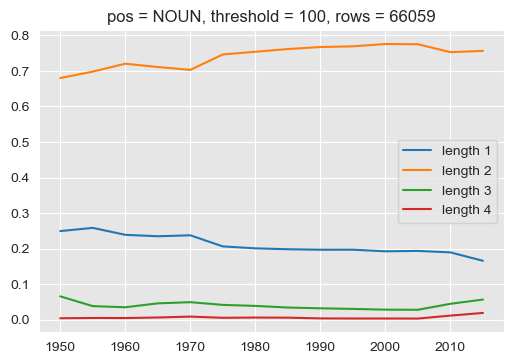

/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)


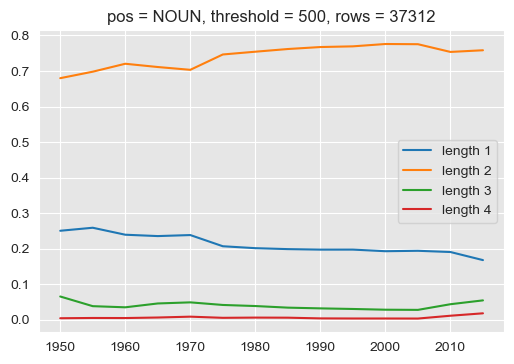

/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)


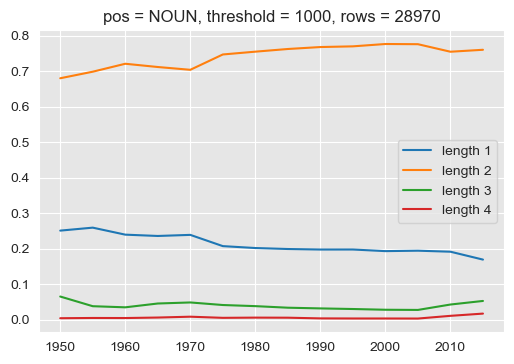

In [13]:
generate(100, 'NOUN')
generate(500, 'NOUN')
generate(1000, 'NOUN')

/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)


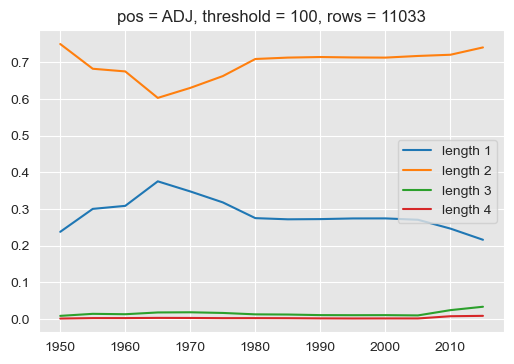

/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)


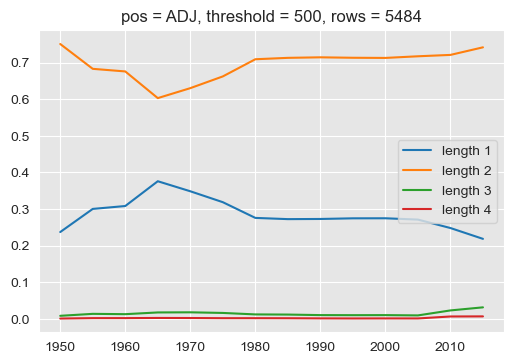

/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)
/tmp/ipykernel_140584/1555716016.py:19: RuntimeWarning: invalid value encountered in true_divide
  points = np.array(numers) / np.array(denoms)


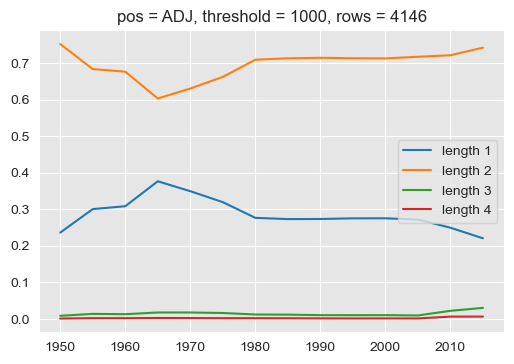

In [14]:
generate(100, 'ADJ')
generate(500, 'ADJ')
generate(1000, 'ADJ')

In [17]:
def row_is_at_least_threshold(row):
        return sum(row[f'{t}_n_occ'] for t in time_periods) >= 1000

df_verb = df[df.pos == 'VERB']
df_verb_thres = df_verb[df_verb.apply(row_is_at_least_threshold, axis=1)]
df_verb_thres.head(30)

,term,pos,1950_n_occ,1950_n_occ_norm,1955_n_occ,1955_n_occ_norm,1960_n_occ,1960_n_occ_norm,1965_n_occ,1965_n_occ_norm,...,2000_n_occ,2000_n_occ_norm,2005_n_occ,2005_n_occ_norm,2010_n_occ,2010_n_occ_norm,2015_n_occ,2015_n_occ_norm,2020_n_occ,2020_n_occ_norm
14,立起,VERB,0,0.000000,26,6.100000,7,5.000000,0,0.000000,...,457,7.539122,333,7.398795,133,6.707677,135,4.572745,0,0
24,珍重,VERB,0,0.000000,21,5.309524,6,3.000000,5,3.000000,...,302,5.785339,193,5.560864,31,5.666667,44,4.575000,0,0
28,势,VERB,1,1.000000,546,8.968942,258,9.010827,131,8.903736,...,36192,17.250151,26036,17.182941,2452,18.734612,1387,9.932074,0,0
29,就职,VERB,18,9.000000,110,10.166783,25,5.200000,11,6.500000,...,6075,11.348731,4670,11.137557,672,13.910422,488,8.592381,0,0
59,合理化,VERB,14,6.500000,219,9.750215,67,7.974126,11,5.400000,...,12446,12.719181,6577,11.279783,593,10.634846,390,11.073953,0,0
67,加深,VERB,9,5.666667,1374,15.562125,664,14.818296,312,14.375455,...,35044,15.987701,28927,17.017307,2709,16.959343,1753,11.255404,0,0
70,优,VERB,1,1.000000,108,7.276190,109,10.115873,15,4.500000,...,19004,14.903223,16004,15.773802,889,10.762248,375,7.411101,0,0
84,调往,VERB,0,0.000000,3,3.000000,2,2.000000,1,1.000000,...,173,9.896358,140,6.660227,83,8.711355,98,6.031008,0,0
108,转向,VERB,4,4.000000,380,12.767698,60,11.914530,100,10.569048,...,113211,38.292085,80677,36.313608,6117,29.693874,3716,21.997372,0,0
113,物色,VERB,2,2.000000,58,6.686275,5,3.000000,1,1.000000,...,1340,6.344705,838,6.383037,130,7.912598,157,5.901512,0,0


In [18]:
def row_is_at_least_threshold(row):
        return sum(row[f'{t}_n_occ'] for t in time_periods) >= 1000

df_verb = df[df.pos == 'NOUN']
df_verb_thres = df_verb[df_verb.apply(row_is_at_least_threshold, axis=1)]
df_verb_thres.head(30)

,term,pos,1950_n_occ,1950_n_occ_norm,1955_n_occ,1955_n_occ_norm,1960_n_occ,1960_n_occ_norm,1965_n_occ,1965_n_occ_norm,...,2000_n_occ,2000_n_occ_norm,2005_n_occ,2005_n_occ_norm,2010_n_occ,2010_n_occ_norm,2015_n_occ,2015_n_occ_norm,2020_n_occ,2020_n_occ_norm
0,注销,NOUN,0,0.000000,12,3.600000,4,2.500000,0,0.000000,...,1652,10.214508,2175,12.761146,165,11.152918,81,9.468750,0,0
3,叹息,NOUN,1,1.000000,9,5.000000,7,4.500000,2,2.000000,...,603,6.554055,525,6.059227,67,6.031401,110,4.755261,0,0
38,健全,NOUN,49,27.500000,742,12.750375,747,45.365828,65,8.362637,...,73830,33.759037,71881,46.605226,6175,53.400453,988,10.908174,0,0
50,反讽,NOUN,0,0.000000,0,0.000000,0,0.000000,0,0.000000,...,550,10.733363,630,10.204198,80,11.650000,28,5.000000,0,0
54,电离,NOUN,0,0.000000,58,11.747619,118,36.750000,66,14.933333,...,1142,20.097351,2061,31.681261,139,19.517974,130,13.215152,0,0
66,中正,NOUN,0,0.000000,70,5.613095,25,5.333333,94,40.666667,...,2055,6.683520,1695,7.285669,388,15.333144,109,8.073052,0,0
69,存量,NOUN,0,0.000000,41,7.519481,23,7.966667,6,1.500000,...,18369,51.500370,14239,47.804603,2832,46.650311,1690,29.826023,0,0
74,行话,NOUN,0,0.000000,14,2.083333,1,1.000000,0,0.000000,...,427,6.211787,391,6.404736,31,5.200000,45,4.948718,0,0
85,首位,NOUN,0,0.000000,279,8.613333,149,11.718552,215,14.488095,...,28919,15.959895,19033,15.186590,1643,18.580983,556,7.885502,0,0
94,星期日,NOUN,5,5.000000,620,15.534530,70,7.567766,34,8.900000,...,2530,9.119515,2079,9.241142,216,8.069678,273,7.948295,0,0


In [19]:
def row_is_at_least_threshold(row):
        return sum(row[f'{t}_n_occ'] for t in time_periods) >= 1000

df_verb = df[df.pos == 'ADJ']
df_verb_thres = df_verb[df_verb.apply(row_is_at_least_threshold, axis=1)]
df_verb_thres.head(30)

,term,pos,1950_n_occ,1950_n_occ_norm,1955_n_occ,1955_n_occ_norm,1960_n_occ,1960_n_occ_norm,1965_n_occ,1965_n_occ_norm,...,2000_n_occ,2000_n_occ_norm,2005_n_occ,2005_n_occ_norm,2010_n_occ,2010_n_occ_norm,2015_n_occ,2015_n_occ_norm,2020_n_occ,2020_n_occ_norm
51,些小,ADJ,1,1.000000,65,5.679167,17,4.500000,10,5.000000,...,319,5.300034,206,5.137610,37,5.125000,32,4.333333,0,0
68,信访,ADJ,0,0.000000,2,1.000000,0,0.000000,0,0.000000,...,1030,30.547943,437,9.099976,48,11.071429,1,1.000000,0,0
140,每周,ADJ,0,0.000000,14,5.750000,4,3.000000,0,0.000000,...,327,11.598968,242,7.788274,187,8.111296,137,6.337733,0,0
142,例行,ADJ,0,0.000000,8,4.000000,4,4.000000,1,1.000000,...,488,12.039287,575,12.536369,544,18.812761,260,5.413006,0,0
186,活性,ADJ,0,0.000000,20,5.666667,5,4.000000,11,2.800000,...,919,10.149416,772,9.567658,73,9.155556,47,6.577778,0,0
324,循,ADJ,0,0.000000,11,5.000000,11,4.000000,3,2.000000,...,1103,6.934997,885,6.720403,125,6.157602,74,4.526316,0,0
364,生死攸关,ADJ,0,0.000000,15,2.300000,0,0.000000,2,1.000000,...,355,6.008225,205,5.509516,11,4.200000,27,4.111111,0,0
420,必然性,ADJ,2,2.000000,346,12.627090,146,13.529545,17,2.833333,...,3588,9.544559,2623,9.849837,123,7.264025,152,8.652056,0,0
543,前任,ADJ,2,1.000000,47,5.880952,19,5.400000,3,3.000000,...,2572,8.413953,2099,8.672820,278,9.149255,277,7.317716,0,0
644,建设性,ADJ,0,0.000000,2,2.000000,0,0.000000,0,0.000000,...,488,11.227805,381,10.155880,173,9.440853,129,6.597826,0,0
